<a href="https://colab.research.google.com/github/DavidCastro88/USWindEnergyProductionForecasts/blob/main/USWindEnergyProductionForecasts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Manipulación y tratamiento de Datos
import numpy as np
import pandas as pd
from datetime import datetime

# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Modelación Arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/DavidCastro88/USWindEnergyProductionForecasts/main/wind-power-production-us.csv')
data.head()

,date,other_united_states,other_new_england,other_connecticut,other_maine,other_massachusetts,other_new_hampshire,other_rhode_island,other_vermont,other_middle_atlantic,...,wind_new_mexico,wind_utah,wind_wyoming,wind_pacific_contiguous,wind_california,wind_oregon,wind_washington,wind_pacific_noncontiguous,wind_alaska,wind_hawaii
0,Jan 2001,6025,678,75,348,113,91,10,42,371,...,--,--,26,137,133,3,--,0,0,0
1,Feb 2001,5310,599,77,293,103,83,9,35,338,...,--,--,23,151,148,3,--,0,0,0
2,Mar 2001,5795,660,96,327,101,93,9,33,381,...,--,--,22,308,300,8,--,0,0,0
3,Apr 2001,5827,593,92,277,106,81,9,27,361,...,--,--,13,399,393,6,--,0,0,0
4,May 2001,5738,640,72,336,109,86,9,27,392,...,--,--,16,383,378,6,--,0,0,0


Variables:

"wind_state_name" : wind power production for the current state
"other_state_name" : production for all other renewables sources for the current state

In [4]:
nuevas_columnas = data.filter(regex='^date$|^wind.*$', axis=1)
data_wind = nuevas_columnas.copy()
data_wind

,date,wind,wind_united_states,wind_new_england,wind_connecticut,wind_maine,wind_massachusetts,wind_new_hampshire,wind_rhode_island,wind_vermont,...,wind_new_mexico,wind_utah,wind_wyoming,wind_pacific_contiguous,wind_california,wind_oregon,wind_washington,wind_pacific_noncontiguous,wind_alaska,wind_hawaii
0,Jan 2001,NaN,389,1,--,--,--,--,--,1,...,--,--,26,137,133,3,--,0,0,0
1,Feb 2001,NaN,431,1,--,--,--,--,--,1,...,--,--,23,151,148,3,--,0,0,0
2,Mar 2001,NaN,532,1,--,--,--,--,--,1,...,--,--,22,308,300,8,--,0,0,0
3,Apr 2001,NaN,685,1,--,--,--,--,--,1,...,--,--,13,399,393,6,--,0,0,0
4,May 2001,NaN,635,1,--,--,--,--,--,1,...,--,--,16,383,378,6,--,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Oct 2022,NaN,32824,290,1,196,19,27,18,28,...,966,34,725,2456,1006,709,741,52,12,40
262,Nov 2022,NaN,41826,428,NM,287,25,53,22,39,...,1345,71,935,2904,1284,785,835,80,15,65
263,Dec 2022,NaN,39282,421,1,285,18,48,25,43,...,1548,71,1143,2660,1207,698,756,62,14,48
264,Jan 2023,NaN,39076,323,1,243,14,29,20,15,...,1681,78,922,2771,1381,687,703,43,12,31


In [5]:
data_wind.columns

Index(['date', 'wind', 'wind_united_states', 'wind_new_england',
       'wind_connecticut', 'wind_maine', 'wind_massachusetts',
       'wind_new_hampshire', 'wind_rhode_island', 'wind_vermont',
       'wind_middle_atlantic', 'wind_new_jersey', 'wind_new_york',
       'wind_pennsylvania', 'wind_east_north_central', 'wind_illinois',
       'wind_indiana', 'wind_michigan', 'wind_ohio', 'wind_wisconsin',
       'wind_west_north_central', 'wind_iowa', 'wind_kansas', 'wind_minnesota',
       'wind_missouri', 'wind_nebraska', 'wind_north_dakota',
       'wind_south_dakota', 'wind_south_atlantic', 'wind_delaware',
       'wind_district_of_columbia', 'wind_florida', 'wind_georgia',
       'wind_maryland', 'wind_north_carolina', 'wind_south_carolina',
       'wind_virginia', 'wind_west_virginia', 'wind_east_south_central',
       'wind_alabama', 'wind_kentucky', 'wind_mississippi', 'wind_tennessee',
       'wind_west_south_central', 'wind_arkansas', 'wind_louisiana',
       'wind_oklahoma', 'win

In [6]:
data_wind['suma'] = data_wind.iloc[:, 3:].sum(axis=1)
serie=data_wind[['date','suma']]

In [7]:
serie=serie.rename(columns={'suma':'wind_power'})

In [8]:
serie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        266 non-null    object
 1   wind_power  266 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.3+ KB


In [9]:
serie['date'] = pd.to_datetime(serie['date'])

In [10]:
serie = serie.set_index("date")
serie.head()

,wind_power
date,
2001-01-01,776
2001-02-01,861
2001-03-01,1063
2001-04-01,1368
2001-05-01,1269


In [11]:
serie.index.freq = 'MS'

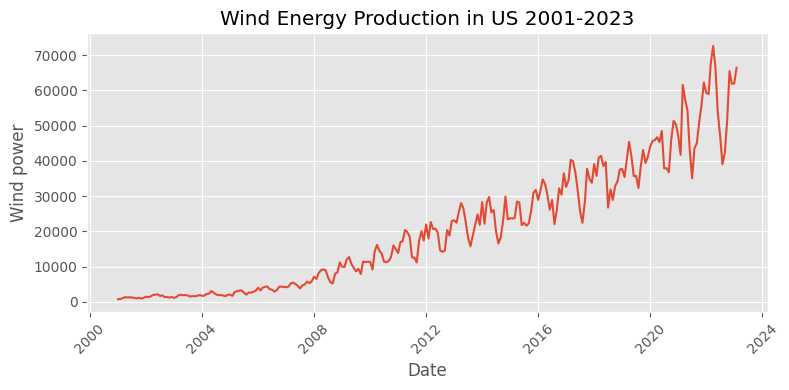

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(serie.index, serie['wind_power'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('Wind power')
plt.title('Wind Energy Production in US 2001-2023')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

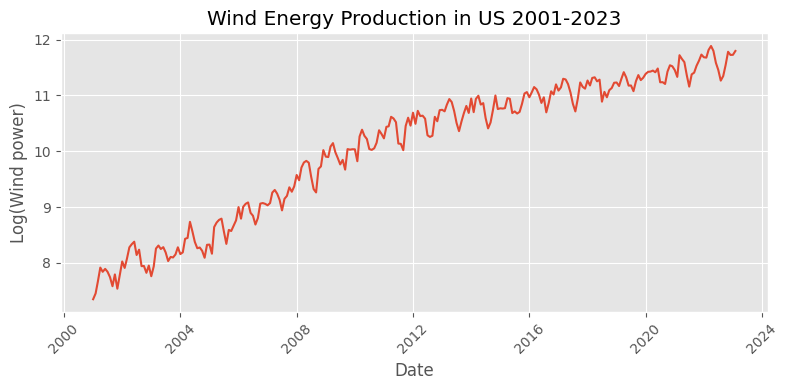

In [ ]:
serie['wind_power_log'] = np.log(serie['wind_power'])
plt.figure(figsize=(8, 4))
plt.plot(serie.index, serie['wind_power_log'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('Log(Wind power)')
plt.title('Wind Energy Production in US 2001-2023')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

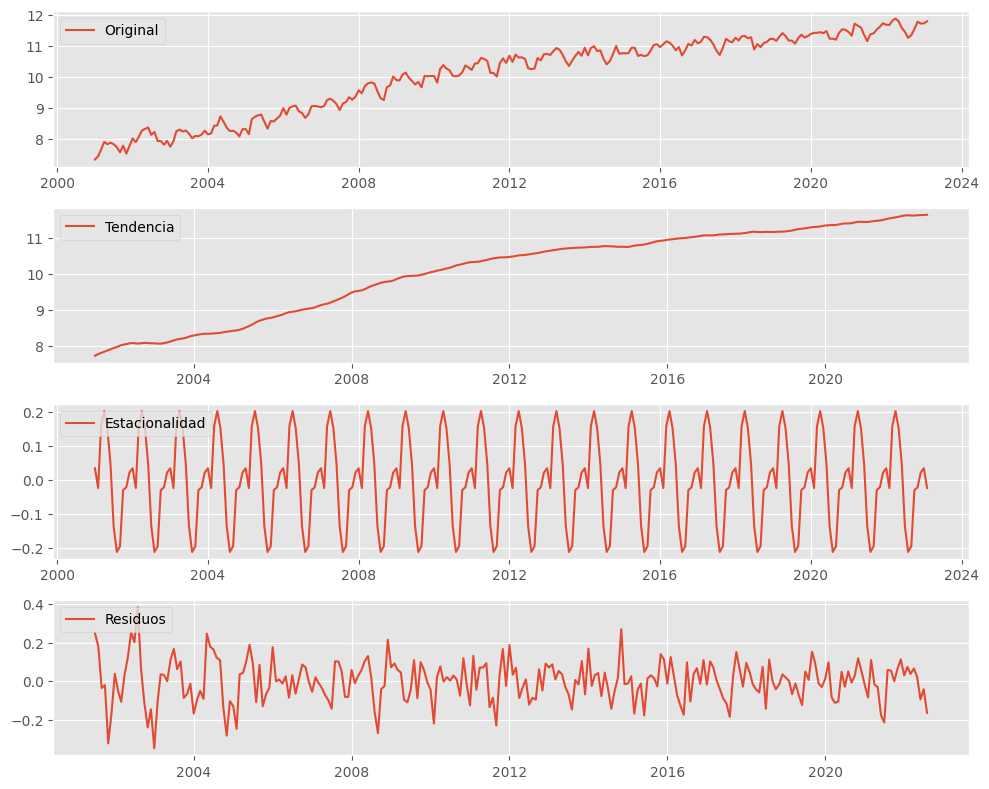

In [ ]:
import statsmodels.api as sm

serie.index = pd.to_datetime(serie.index)
decomposition = sm.tsa.seasonal_decompose(serie['wind_power_log'], model='additive')
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(serie.index, serie['wind_power_log'], label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(serie.index, decomposition.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(serie.index, decomposition.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(serie.index, decomposition.resid, label='Residuos')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [ ]:
Prueba_Dickey_Fuller(serie['wind_power_log'],'wind_power_log')

Resultados de la prueba de Dickey-Fuller para columna: wind_power_log
Test Statistic                         -2.062159
p-value                                 0.260000
No Lags Used                           15.000000
Número de observaciones utilizadas    250.000000
Critical Value (1%)                    -3.456781
Critical Value (5%)                    -2.873172
Critical Value (10%)                   -2.572969
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


In [ ]:
serie1=serie.copy()
serie1['yt_diff'] = serie['wind_power_log'].diff()
serie1.dropna(inplace=True)
serie1.head()

,wind_power,wind_power_log,yt_diff
date,,,
2001-02-01,1722,7.451242,0.103942
2001-03-01,2126,7.661998,0.210756
2001-04-01,2736,7.914252,0.252255
2001-05-01,2538,7.839132,-0.075121
2001-06-01,2674,7.891331,0.052199


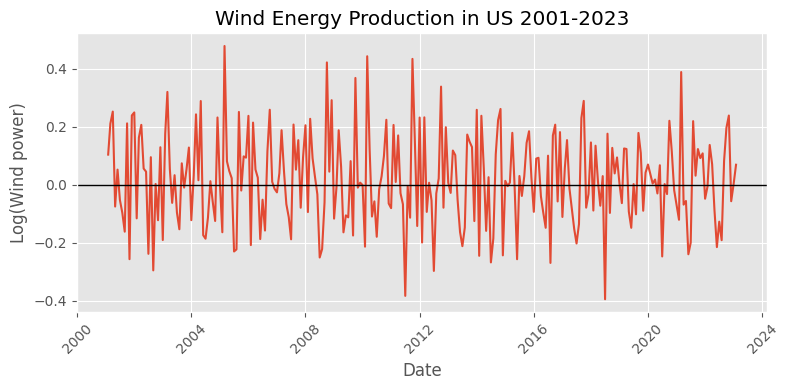

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(serie1.index, serie1['yt_diff'], linestyle='-')
plt.axhline(y=0, color='k', linestyle='-', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Log(Wind power)')
plt.title('Wind Energy Production in US 2001-2023')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
D = 1  # Orden de la diferencia estacional
s = 12  # Periodo estacional
serie1['yt_diff_diff'] = serie1['yt_diff'].diff(periods=s*D)
serie1.dropna(inplace=True)
serie1.head()

,wind_power,wind_power_log,yt_diff,yt_diff_diff
date,,,,
2002-02-01,2720,7.908387,-0.115820,-0.219762
2002-03-01,3200,8.070906,0.162519,-0.048237
2002-04-01,3934,8.277412,0.206506,-0.045749
2002-05-01,4160,8.333270,0.055858,0.130979
2002-06-01,4352,8.378391,0.045120,-0.007079


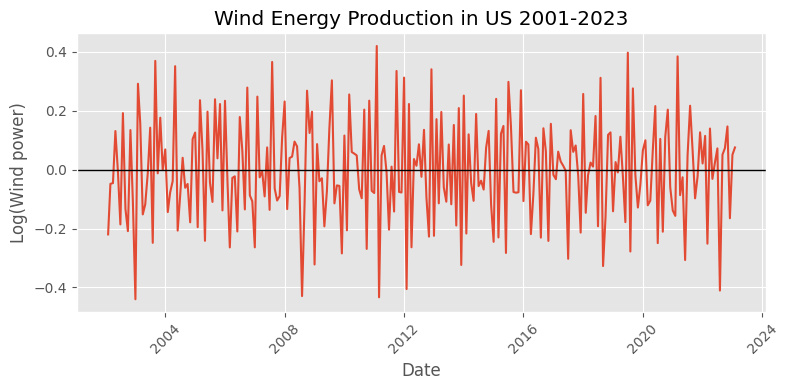

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(serie1.index, serie1['yt_diff_diff'], linestyle='-')
plt.axhline(y=0, color='k', linestyle='-', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Log(Wind power)')
plt.title('Wind Energy Production in US 2001-2023')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
Prueba_Dickey_Fuller(serie1['yt_diff_diff'],'yt_diff_diff')

Resultados de la prueba de Dickey-Fuller para columna: yt_diff_diff
Test Statistic                       -7.114820e+00
p-value                               3.855227e-10
No Lags Used                          1.600000e+01
Número de observaciones utilizadas    2.360000e+02
Critical Value (1%)                  -3.458366e+00
Critical Value (5%)                  -2.873866e+00
Critical Value (10%)                 -2.573339e+00
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


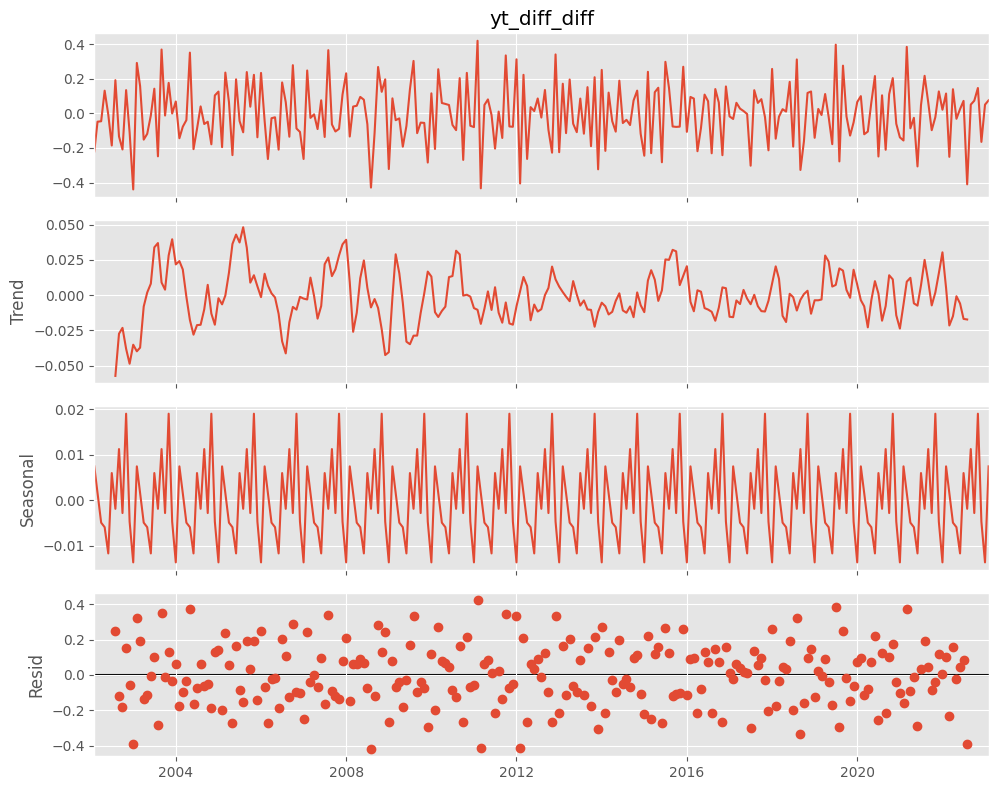

In [ ]:
plt.rcParams["figure.figsize"] = (10, 8)
a = seasonal_decompose(serie1['yt_diff_diff'], model = "add")
a.plot();

In [ ]:
train_data = serie[:len(serie)-12]
test_data = serie[len(serie)-12:]
test=test_data.copy()

In [ ]:
train_data.shape, test_data.shape

((254, 2), (12, 2))

In [ ]:
test_data

,wind_power,wind_power_log
date,,
2022-03-01,135236,11.814777
2022-04-01,145192,11.885812
2022-05-01,133058,11.798540
2022-06-01,107328,11.583645
2022-07-01,94508,11.456440
2022-08-01,78070,11.265361
2022-09-01,84746,11.347414
2022-10-01,103120,11.543649
2022-11-01,130908,11.782250


In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
modelo_auto=auto_arima(train_data['wind_power_log'],start_p=0,start_q=0,d=1,
          max_p=4,max_d=2,max_q=4, start_P=0,
          D=1, start_Q=0, max_P=2,max_D=1,
          max_Q=2, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-156.200, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-275.327, Time=0.86 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-329.289, Time=2.18 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-229.992, Time=0.44 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-329.556, Time=3.31 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-303.713, Time=0.45 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-327.635, Time=2.30 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=6.78 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-329.643, Time=2.57 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-273.050, Time=1.31 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-330.080, Time=3.13 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-330.383, Time=1.45 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-229.984, Time=0.23 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-330.186, Time=1.58 sec
 ARIMA(1,1,1)(1,1,0)[12]

In [ ]:
print(modelo_auto.summary())

In [ ]:
arima_model = SARIMAX(train_data['wind_power_log'], order = (2,1,1), seasonal_order = (1,1,2,12))
model1 = arima_model.fit()
model1.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                          wind_power_log   No. Observations:                  254
Model:             SARIMAX(2, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                 172.207
Date:                                 Tue, 02 Apr 2024   AIC                           -330.414
Time:                                         21:23:13   BIC                           -306.021
Sample:                                     01-01-2001   HQIC                          -320.587
                                          - 02-01-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2693      0.093      2.889      0.004       0.087       0.452
ar.L2          0.1332      0.084      1.590      0.112      -0.031       0.297
ma.L1         -0.8454      0.071    -11.920      0.000      -0.984      -0.706
ar.S.L12      -0.9231      0.170     -5.422      0.000      -1.257      -0.589
ma.S.L12       0.1750      0.210      0.832      0.405      -0.237       0.587
ma.S.L24      -0.6128      0.165     -3.723      0.000      -0.935      -0.290
sigma2         0.0134      0.001      9.801      0.000       0.011       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.84
Prob(Q):                              0.97   Prob(JB):                         0.24
Heteroskedasticity (H):               0.61   Skew:                             0.25
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from skforecast.Sarimax import Sarimax
modelo = Sarimax(order=(2, 1, 1), seasonal_order=(0, 1, 1, 12))
modelo.fit(y=train_data['wind_power_log'])
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     wind_power_log   No. Observations:                  254
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 170.792
Date:                            Tue, 02 Apr 2024   AIC                           -331.585
Time:                                    21:28:36   BIC                           -314.161
Sample:                                01-01-2001   HQIC                          -324.565
                                     - 02-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2748      0.097      2.842      0.004       0.085       0.464
ar.L2          0.1378      0.083      1.669      0.095      -0.024       0.300
ma.L1         -0.8444      0.072    -11.686      0.000      -0.986      -0.703
ma.S.L12      -0.7292      0.053    -13.630      0.000      -0.834      -0.624
sigma2         0.0136      0.001      9.806      0.000       0.011       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.72
Prob(Q):                              0.96   Prob(JB):                         0.26
Heteroskedasticity (H):               0.59   Skew:                             0.25
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

***Euación del modelo SARIMA (2,1,1)(0,1,1)[12] sin deriva***

\begin{equation}
 \hat{Y_t} =   0.2748 \cdot \log(Y_{t-1}) + 0.1378 \cdot \log(Y_{t-2}) - 0.8444 \cdot \varepsilon_{t-1} + \varepsilon_t - 0.7292 \cdot \varepsilon_{t-12}
\end{equation}

<ipython-input-118-f6e8b98c5d07>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



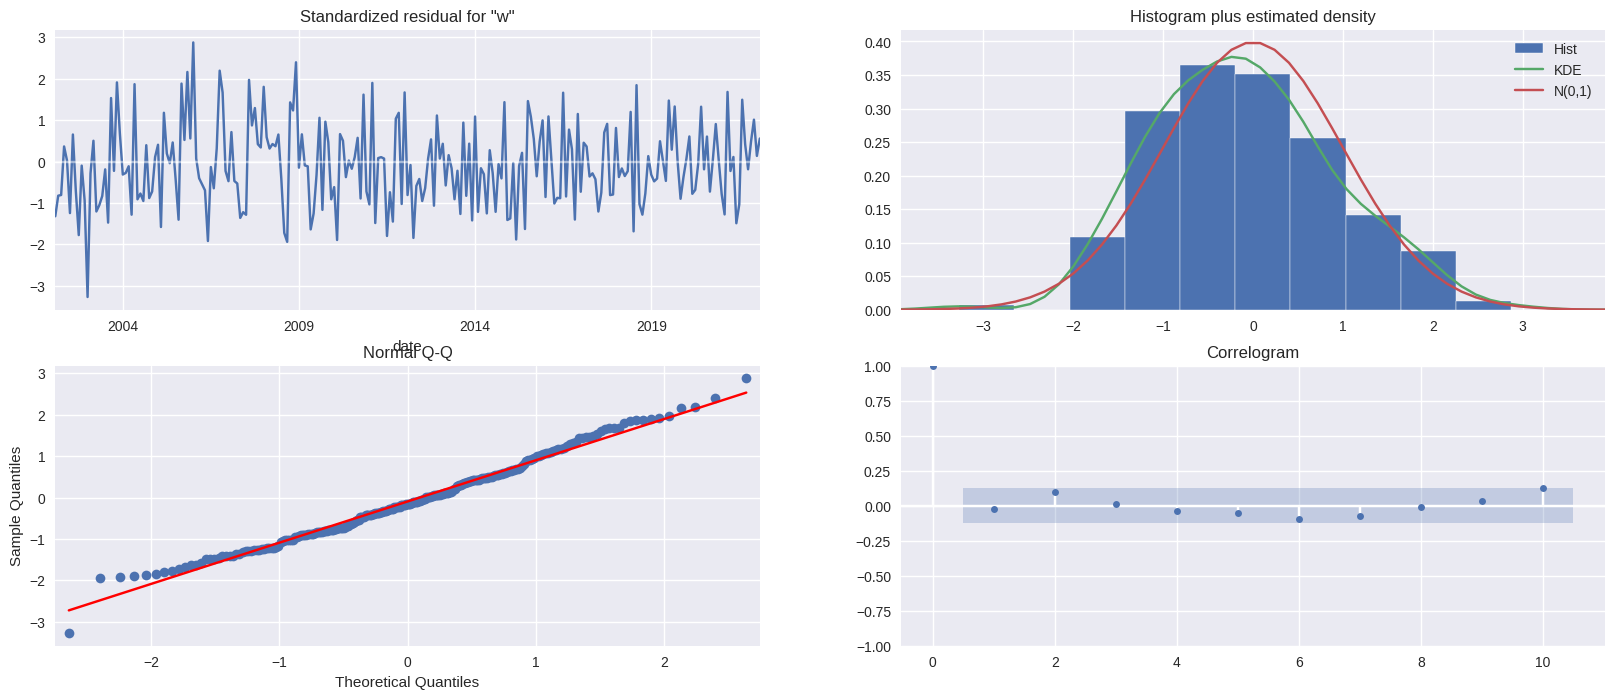

In [ ]:
plt.style.use('seaborn')
model1.plot_diagnostics(figsize=(20,8))
plt.show()

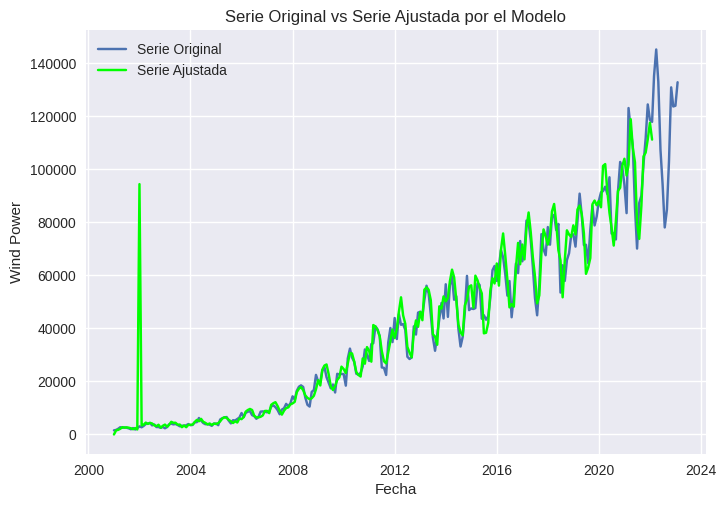

In [ ]:
sigma2 = model1.params['sigma2']
factor_correccion = np.exp(sigma2 / 2)
serie_ajustada = np.exp(model1.fittedvalues) * factor_correccion

plt.plot(serie['wind_power'].index, serie['wind_power'], label='Serie Original')
plt.plot(serie_ajustada.index, serie_ajustada.values, label='Serie Ajustada', linestyle='-',color='lime')
plt.xlabel('Fecha')
plt.ylabel('Wind Power')
plt.title('Serie Original vs Serie Ajustada por el Modelo')
plt.legend()
plt.show()

In [ ]:
arima_pred = np.exp(model1.predict(start = len(train_data), end = len(serie)-1, typ="levels").rename("ARIMA Predictions"))*factor_correccion
arima_pred

2022-03-01    135945.862586
2022-04-01    137196.083358
2022-05-01    128024.612828
2022-06-01    114726.394049
2022-07-01     95719.456425
2022-08-01     98195.074332
2022-09-01    103326.173405
2022-10-01    122684.060909
2022-11-01    128883.236726
2022-12-01    134661.737085
2023-01-01    133782.826221
2023-02-01    129141.863211
Freq: MS, Name: ARIMA Predictions, dtype: float64

<ipython-input-104-ff6791c93252>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



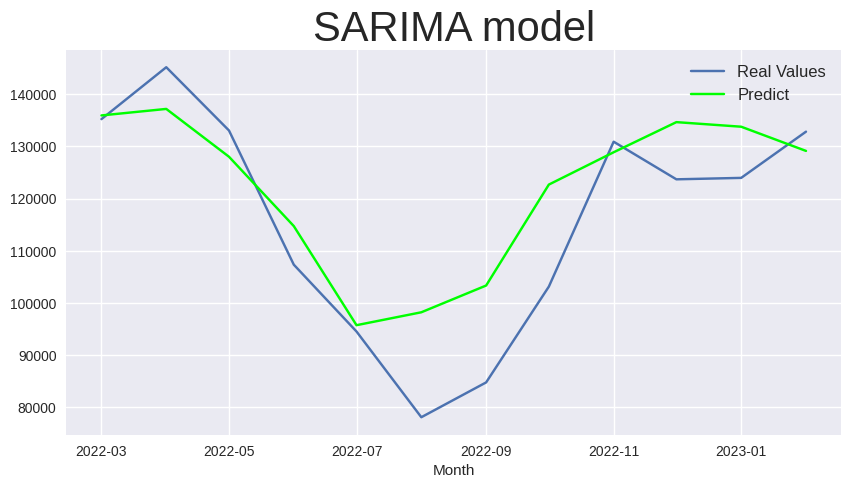

In [ ]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(test_data["wind_power"], label="Real Values")
plt.plot(arima_pred, color="lime", label="Predict")
plt.title("SARIMA model", fontsize=30);
plt.xlabel('Month')
plt.ylabel('')
plt.legend( fontsize=12);
plt.show();

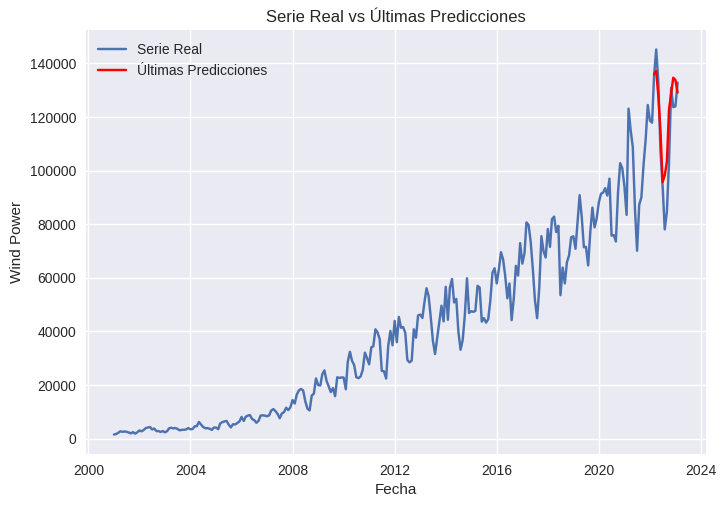

In [ ]:
plt.plot(serie['wind_power'].index, serie['wind_power'].values, label='Serie Real')
plt.plot(arima_pred.index, arima_pred.values, label='Últimas Predicciones', linestyle='-',color='red')
plt.xlabel('Fecha')
plt.ylabel('Wind Power')
plt.title('Serie Real vs Últimas Predicciones')
plt.legend()
plt.show()

In [ ]:
def evaluacion_metrica(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
evaluacion_metrica(test_data['wind_power'],arima_pred)

Evaluation metric results:-
MSE is : 126107144.24053867
MAE is : 8926.315740728922
RMSE is : 11229.743729958342
MAPE is : 8.814454520177389
R2 is : 0.712302393032578



In [ ]:
test_data['Model1_Predictions'] = arima_pred
test_data

<ipython-input-150-d1c3621ab78f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,wind_power,wind_power_log,Model1_Predictions
date,,,
2022-03-01,135236,11.814777,135945.862586
2022-04-01,145192,11.885812,137196.083358
2022-05-01,133058,11.798540,128024.612828
2022-06-01,107328,11.583645,114726.394049
2022-07-01,94508,11.456440,95719.456425
2022-08-01,78070,11.265361,98195.074332
2022-09-01,84746,11.347414,103326.173405
2022-10-01,103120,11.543649,122684.060909
2022-11-01,130908,11.782250,128883.236726


## ***LSTM Forecast***

In [ ]:
data_train=train_data.copy()
data_train=data_train.drop('wind_power_log',axis=1)
data_train

,wind_power
date,
2001-01-01,1552
2001-02-01,1722
2001-03-01,2126
2001-04-01,2736
2001-05-01,2538
...,...
2021-10-01,101884
2021-11-01,111698
2021-12-01,124470


In [ ]:
data_test=test.copy()
data_test=data_test.drop('wind_power_log',axis=1)
data_test

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_train)
scaled_train_data = scaler.transform(data_train)
scaled_test_data = scaler.transform(data_test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200)               161600    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 161801 (632.04 KB)
Trainable params: 161801 (632.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator,epochs=100)

Epoch 1/100


<ipython-input-144-768109e7bd49>:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



242/242 [==============================] - 9s 26ms/step - loss: 0.1525
Epoch 2/100
242/242 [==============================] - 3s 11ms/step - loss: 0.0696
Epoch 3/100
242/242 [==============================] - 4s 16ms/step - loss: 0.0782
Epoch 4/100
242/242 [==============================] - 3s 11ms/step - loss: 0.0659
Epoch 5/100
242/242 [==============================] - 3s 11ms/step - loss: 0.0653
Epoch 6/100
242/242 [==============================] - 3s 14ms/step - loss: 0.0559
Epoch 7/100
242/242 [==============================] - 3s 13ms/step - loss: 0.0723
Epoch 8/100
242/242 [==============================] - 3s 12ms/step - loss: 0.0629
Epoch 9/100
242/242 [==============================] - 4s 16ms/step - loss: 0.0426
Epoch 10/100
242/242 [==============================] - 3s 12ms/step - loss: 0.0437
Epoch 11/100
242/242 [==============================] - 3s 12ms/step - loss: 0.0458
Epoch 12/100
242/242 [==============================] - 3s 11ms/step - loss: 0.0858
Epoch 13/100


In [ ]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred)
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[114408.50599205],
       [149480.69753655],
       [153659.84086406],
       [122950.21285616],
       [ 72037.12182246],
       [125566.32923328],
       [108938.12341492],
       [139928.99977674],
       [152342.46570933],
       [158694.20152419],
       [160045.07086982],
       [175499.64901157]])

In [ ]:
test_data['Model2_Predictions'] = lstm_predictions
test_data

<ipython-input-151-b7a64f5f37ca>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,wind_power,wind_power_log,Model1_Predictions,Model2_Predictions
date,,,,
2022-03-01,135236,11.814777,135945.862586,114408.505992
2022-04-01,145192,11.885812,137196.083358,149480.697537
2022-05-01,133058,11.798540,128024.612828,153659.840864
2022-06-01,107328,11.583645,114726.394049,122950.212856
2022-07-01,94508,11.456440,95719.456425,72037.121822
2022-08-01,78070,11.265361,98195.074332,125566.329233
2022-09-01,84746,11.347414,103326.173405,108938.123415
2022-10-01,103120,11.543649,122684.060909,139928.999777
2022-11-01,130908,11.782250,128883.236726,152342.465709


In [ ]:
evaluacion_metrica(test_data['wind_power'],test_data["Model2_Predictions"])

Evaluation metric results:-
MSE is : 885657378.5112013
MAE is : 27290.330248508864
RMSE is : 29759.99627874979
MAPE is : 25.261599915074584
R2 is : -1.0205160455041353



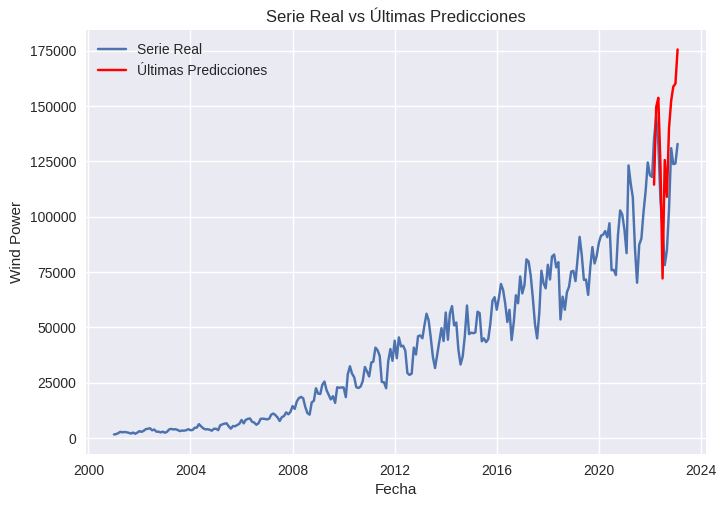

In [ ]:
plt.plot(serie['wind_power'].index, serie['wind_power'].values, label='Serie Real')
plt.plot(test_data["Model2_Predictions"].index, test_data["Model2_Predictions"].values, label='Últimas Predicciones', linestyle='-',color='red')
plt.xlabel('Fecha')
plt.ylabel('Wind Power')
plt.title('Serie Real vs Últimas Predicciones')
plt.legend()
plt.show()

<ipython-input-155-a3df801c4b9e>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



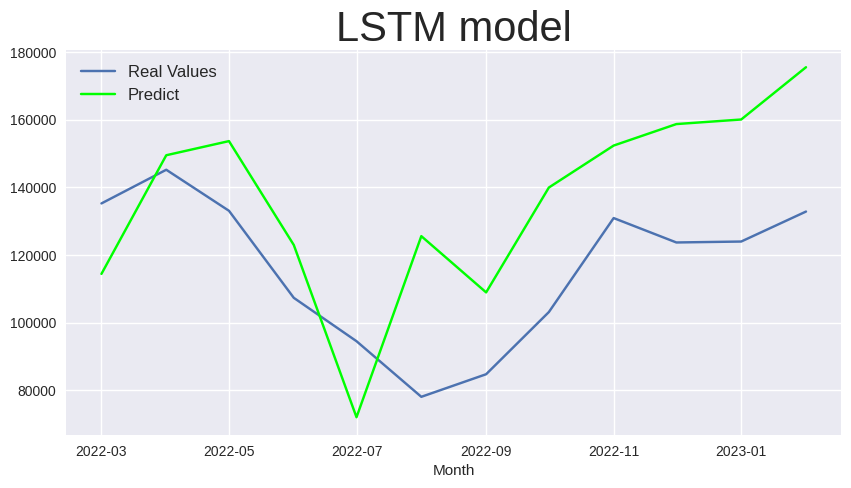

In [ ]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(test_data["wind_power"], label="Real Values")
plt.plot(test_data["Model2_Predictions"], color="lime", label="Predict")
plt.title("LSTM model", fontsize=30);
plt.xlabel('Month')
plt.ylabel('')
plt.legend( fontsize=12);
plt.show();

## ***Prophet Forecast***

In [ ]:
logYt=serie.copy()
logYt=logYt['wind_power_log']
logYt

date
2001-01-01     7.347300
2001-02-01     7.451242
2001-03-01     7.661998
2001-04-01     7.914252
2001-05-01     7.839132
                ...    
2022-10-01    11.543649
2022-11-01    11.782250
2022-12-01    11.725566
2023-01-01    11.727795
2023-02-01    11.796856
Freq: MS, Name: wind_power_log, Length: 266, dtype: float64

In [ ]:
logYt=logYt.reset_index()

In [ ]:
logYt_fb=logYt.rename(columns={"date":"ds", "wind_power_log":"y"} )
logYt_fb.head()

,ds,y
0,2001-01-01,7.347300
1,2001-02-01,7.451242
2,2001-03-01,7.661998
3,2001-04-01,7.914252
4,2001-05-01,7.839132


In [ ]:
train_data_pr = logYt_fb.iloc[:len(logYt)-12]
test_data_pr = logYt_fb.iloc[len(logYt)-12:]

In [ ]:
from prophet import Prophet
m = Prophet()
m.fit(train_data_pr)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6us8vgah/jq58mqfe.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6us8vgah/t90dttz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24025', 'data', 'file=/tmp/tmp6us8vgah/jq58mqfe.json', 'init=/tmp/tmp6us8vgah/t90dttz7.json', 'output', 'file=/tmp/tmp6us8vgah/prophet_model07mib57d/prophet_model-20240403003633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:36:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

In [ ]:
prophet_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,7.673361,7.532058,7.831619,7.673361,7.673361,-0.001974,-0.001974,-0.001974,-0.001974,-0.001974,-0.001974,0.0,0.0,0.0,7.671387
1,2001-02-01,7.692621,7.456213,7.738887,7.692621,7.692621,-0.093624,-0.093624,-0.093624,-0.093624,-0.093624,-0.093624,0.0,0.0,0.0,7.598998
2,2001-03-01,7.710018,7.701143,7.986073,7.710018,7.710018,0.132728,0.132728,0.132728,0.132728,0.132728,0.132728,0.0,0.0,0.0,7.842745
3,2001-04-01,7.729278,7.758402,8.042108,7.729278,7.729278,0.166688,0.166688,0.166688,0.166688,0.166688,0.166688,0.0,0.0,0.0,7.895965
4,2001-05-01,7.747917,7.729609,8.020915,7.747917,7.747917,0.129757,0.129757,0.129757,0.129757,0.129757,0.129757,0.0,0.0,0.0,7.877674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,2022-10-01,11.655465,11.455254,11.750458,11.648404,11.663379,-0.055208,-0.055208,-0.055208,-0.055208,-0.055208,-0.055208,0.0,0.0,0.0,11.600256
262,2022-11-01,11.664345,11.483415,11.785070,11.655111,11.675015,-0.032939,-0.032939,-0.032939,-0.032939,-0.032939,-0.032939,0.0,0.0,0.0,11.631406
263,2022-12-01,11.672939,11.506473,11.803254,11.661924,11.685309,-0.015054,-0.015054,-0.015054,-0.015054,-0.015054,-0.015054,0.0,0.0,0.0,11.657885
264,2023-01-01,11.681819,11.530463,11.819869,11.668965,11.696356,-0.000950,-0.000950,-0.000950,-0.000950,-0.000950,-0.000950,0.0,0.0,0.0,11.680869


In [ ]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

In [ ]:
prophet_pred = prophet_pred.set_index("Date")

In [ ]:
prophet_pred.index.freq = "MS"

In [ ]:
prophet_pred

,Pred
Date,
2022-03-01,11.707227
2022-04-01,11.788195
2022-05-01,11.734802
2022-06-01,11.646629
2022-07-01,11.468278
2022-08-01,11.424241
2022-09-01,11.439567
2022-10-01,11.600256
2022-11-01,11.631406


In [ ]:
test_data["Prophet_Predictions"] = np.exp(prophet_pred['Pred'].values)

<ipython-input-213-0dacae55bee3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
test_data

,wind_power,wind_power_log,Model1_Predictions,Model2_Predictions,Prophet_Predictions
date,,,,,
2022-03-01,135236,11.814777,135945.862586,114408.505992,121446.280090
2022-04-01,145192,11.885812,137196.083358,149480.697537,131688.507272
2022-05-01,133058,11.798540,128024.612828,153659.840864,124841.756932
2022-06-01,107328,11.583645,114726.394049,122950.212856,114305.421511
2022-07-01,94508,11.456440,95719.456425,72037.121822,95633.482652
2022-08-01,78070,11.265361,98195.074332,125566.329233,91513.393298
2022-09-01,84746,11.347414,103326.173405,108938.123415,92926.778421
2022-10-01,103120,11.543649,122684.060909,139928.999777,109125.766667
2022-11-01,130908,11.782250,128883.236726,152342.465709,112578.499434


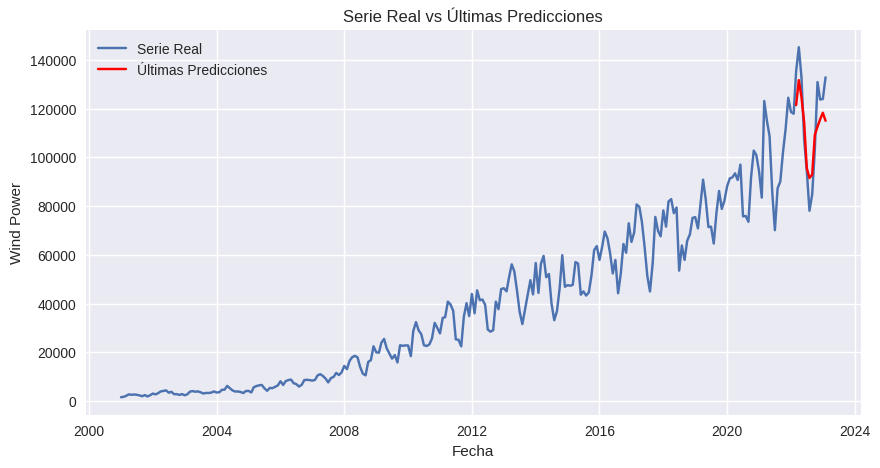

In [ ]:
plt.plot(serie['wind_power'].index, serie['wind_power'].values, label='Serie Real')
plt.plot(test_data["Prophet_Predictions"].index, test_data["Prophet_Predictions"].values, label='Últimas Predicciones', linestyle='-',color='red')
plt.xlabel('Fecha')
plt.ylabel('Wind Power')
plt.title('Serie Real vs Últimas Predicciones')
plt.legend()
plt.show()

<ipython-input-216-80bc980b5618>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



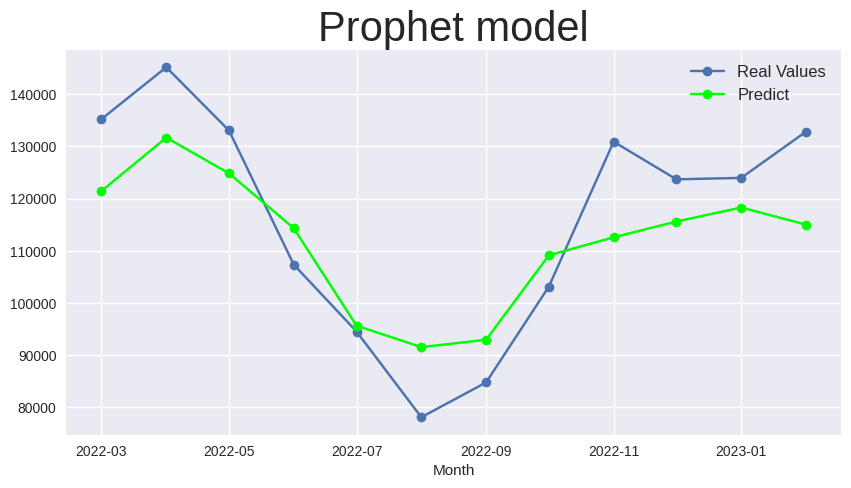

In [ ]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot_date(test_data.index,test_data["wind_power"], label="Real Values",linestyle="-")
plt.plot_date(test_data.index,test_data["Prophet_Predictions"], color="lime", label="Predict",linestyle="-")
plt.title("Prophet model", fontsize=30);
plt.xlabel('Month')
plt.ylabel('')
plt.legend( fontsize=12);
plt.show();

In [ ]:
evaluacion_metrica(test_data['wind_power'],test_data["Prophet_Predictions"])

Evaluation metric results:-
MSE is : 127100903.8638894
MAE is : 10097.9066296653
RMSE is : 11273.903665717984
MAPE is : 8.717541779934427
R2 is : 0.7100352552961663



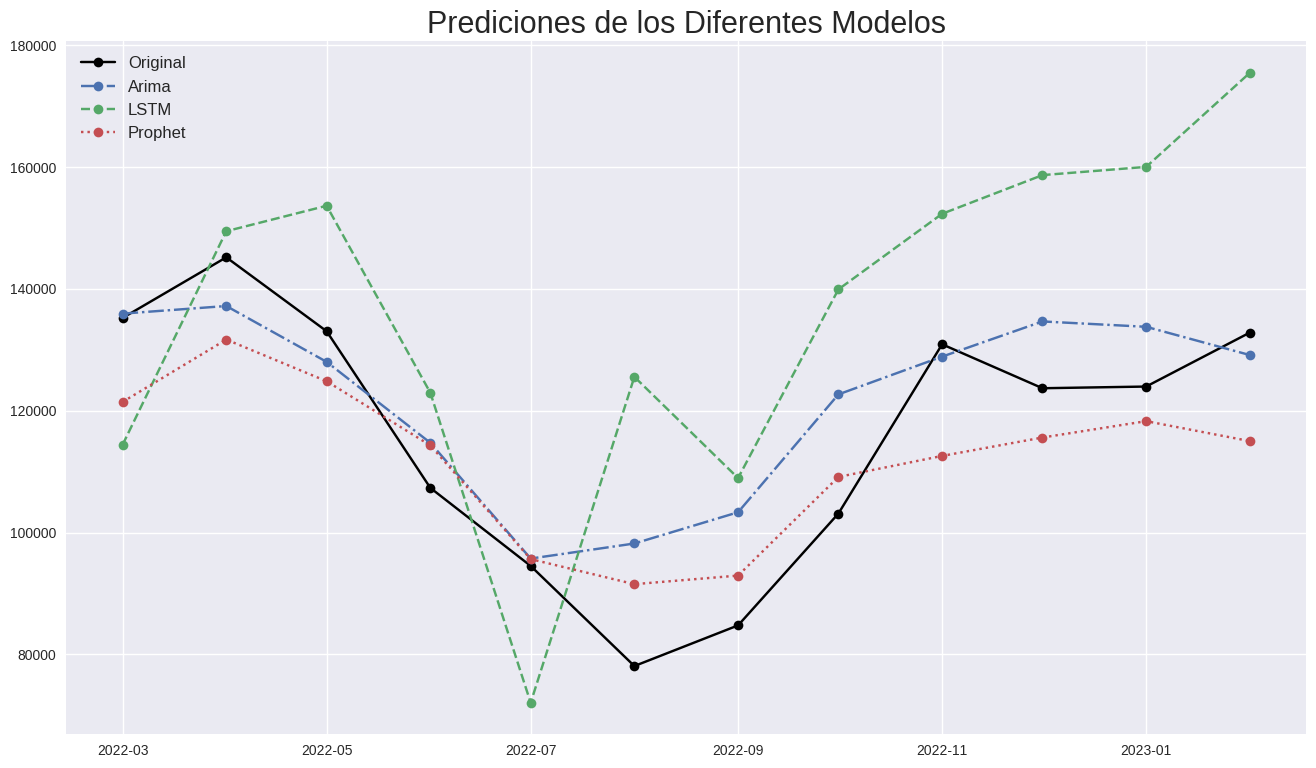

In [ ]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data['wind_power'],label="Original", linestyle="-",color='black')
plt.plot_date(test_data.index, test_data["Model1_Predictions"], label="Arima",linestyle="-.")
plt.plot_date(test_data.index, test_data["Model2_Predictions"],label="LSTM", linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], label="Prophet",linestyle=":")
plt.legend(fontsize=12)
plt.title("Prediciones de los Diferentes Modelos", fontsize=22)
plt.show();